In [62]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
import seaborn as sns
# %matplotlib inline
sns.set()

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

color_list = sns.color_palette()

### CIFAR10

In [63]:
numval = 5
numseed = 4

# mask 0_0, noise_0.1_1
psnr_ndpca = [[21.05, 20.3, 19.39, 17.74, 16.35],
            [21.15, 20.48, 19.4, 17.74, 16.35],
            [21.06, 20.38, 19.4, 17.75, 16.35],
            [21.19, 20.49, 19.41, 17.75, 16.35]]

psnr_no_ndpca = [[21.09, 20.13, 19.04, 17.3, 15.99],
            [21.09, 20.13, 19.04, 17.3, 15.99],
            [21.09, 20.13, 19.04, 17.3, 15.99],
            [21.09, 20.13, 19.04, 17.3, 15.99]]

Z = [64, 48, 32, 16, 8]

Z1 = [[52, 39, 26, 13, 1],
      [52, 39, 26, 13, 1],
      [52, 39, 26, 13, 1],
      [52, 39, 26, 13, 1]]

# convert to numpy array and transpose
psnr_ndpca = np.array(psnr_ndpca).T
psnr_no_ndpca = np.array(psnr_no_ndpca).T

Z = np.array(Z).T
Z1 = np.array(Z1).T

Z2 = np.zeros((numval, numseed))
### calculate Z2 = Z - Z1
for i in range(numval):
	for j in range(numseed):
		# Z1[i, j] = int(Z[i] / 2)
		Z2[i, j] = Z[i] - Z1[i, j]
		# print(Z[i], Z1[i, j], Z2[i, j])

Z1 = [[8, 16, 32, 48, 64],
      [8, 16, 32, 48, 64],
      [8, 16, 32, 48, 64],
      [8, 16, 32, 48, 64],
      [8, 16, 32, 48, 64],
      [8, 16, 32, 48, 64]]    

Z1 = np.array(Z1).T

In [64]:
cifar_df = pd.DataFrame()
### add columns
for i in range(len(psnr_ndpca)): ### latent dim
    for j in range(len(psnr_ndpca[0])): ### seed
        cifar_df = cifar_df.append({'dpca_dim': Z[i], 'Z1': Z1[i, j], 'Z2': Z2[i, j] ,'psnr': psnr_ndpca[i, j], 'method': 'NDPCA (ours)', 'seed': j}, ignore_index=True)
        cifar_df = cifar_df.append({'dpca_dim': Z[i], 'Z1': Z1[i, j], 'Z2': Z2[i, j] ,'psnr': psnr_no_ndpca[i, j], 'method': 'No DPCA module', 'seed': j}, ignore_index=True)

# print(cifar_df.head())
print(cifar_df)

    dpca_dim  Z1    Z2   psnr          method  seed
0         64   8  12.0  21.05    NDPCA (ours)     0
1         64   8  12.0  21.09  No DPCA module     0
2         64   8  12.0  21.15    NDPCA (ours)     1
3         64   8  12.0  21.09  No DPCA module     1
4         64   8  12.0  21.06    NDPCA (ours)     2
5         64   8  12.0  21.09  No DPCA module     2
6         64   8  12.0  21.19    NDPCA (ours)     3
7         64   8  12.0  21.09  No DPCA module     3
8         48  16   9.0  20.30    NDPCA (ours)     0
9         48  16   9.0  20.13  No DPCA module     0
10        48  16   9.0  20.48    NDPCA (ours)     1
11        48  16   9.0  20.13  No DPCA module     1
12        48  16   9.0  20.38    NDPCA (ours)     2
13        48  16   9.0  20.13  No DPCA module     2
14        48  16   9.0  20.49    NDPCA (ours)     3
15        48  16   9.0  20.13  No DPCA module     3
16        32  32   6.0  19.39    NDPCA (ours)     0
17        32  32   6.0  19.04  No DPCA module     0
18        32

### PnP

In [65]:
pnp_df = pd.read_csv('./lift.csv') # seed 0 ep 349
pnp_df.drop(columns=['dim of z2 private'], inplace=True)
pnp_df.rename(columns={"dim of z1 private": "Z1", "dim of z1 share": "Z2"}, inplace=True)
idx = pnp_df[(pnp_df['method'] == 'Task-agnostic NDPCA')].index
pnp_df.drop(idx, inplace=True)
pnp_df = pnp_df[pnp_df['dpca_dim'] <= 24]
pnp_df.head()

,dpca_dim,success rate,Z1,Z2,seed,method
6,24,0.86,10,0,0,NDPCA (ours)
7,20,0.88,8,0,0,NDPCA (ours)
8,16,0.83,6,0,0,NDPCA (ours)
9,12,0.78,5,0,0,NDPCA (ours)
10,8,0.74,3,0,0,NDPCA (ours)


### Airbus

In [66]:
airbus_df = pd.read_csv('./airbus.csv') # seed 0 ep 349
airbus_df.drop(columns=['dim of z2 private'], inplace=True)
airbus_df.rename(columns={"dim of z1 private": "Z1", "dim of z1 share": "Z2"}, inplace=True)
airbus_df

,dpca_dim,Z1,Z2,testmAP,seed,method
0,4,4,0,0.220770,0,NDPCA (ours)
1,8,6,2,0.439348,0,NDPCA (ours)
2,12,9,3,0.617028,0,NDPCA (ours)
3,16,12,4,0.729553,0,NDPCA (ours)
4,20,14,6,0.750393,0,NDPCA (ours)
5,24,17,7,0.759583,0,NDPCA (ours)
6,28,19,9,0.765360,0,NDPCA (ours)
7,32,23,9,0.767108,0,NDPCA (ours)
8,36,25,11,0.766823,0,NDPCA (ours)
9,40,27,13,0.768046,0,NDPCA (ours)


### Plots

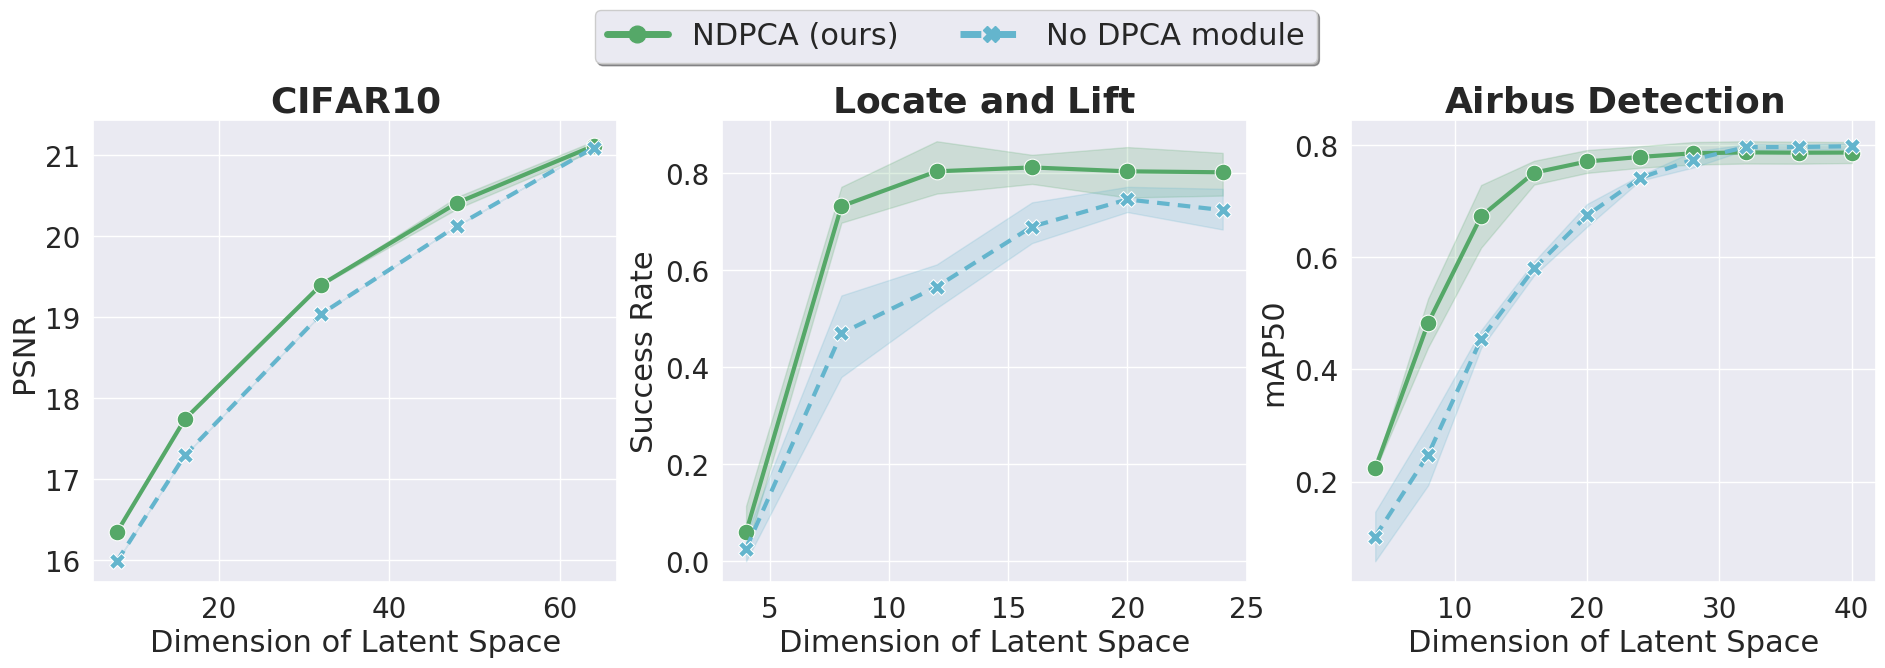

In [67]:
fig, ax_list = plt.subplot_mosaic(
        [["cifar_dpca", "pnp_dpca", "airbus_dpca"]], figsize=(23, 6))

xylabelsize = 22
titlesize = 26
legendsize = 22
ticksize = 20

### set title
ax_list["cifar_dpca"].set_title(r"$\bf{CIFAR10}$", fontsize=titlesize)
ax_list["pnp_dpca"].set_title(r"$\bf{Locate~and~Lift}$", fontsize=titlesize)
ax_list["airbus_dpca"].set_title(r"$\bf{Airbus~Detection}$", fontsize=titlesize)

### plot cifar denoising
## plot DPCA curve
ax1 = sns.lineplot(data=cifar_df, x="dpca_dim", y="psnr", ax=ax_list["cifar_dpca"], linewidth=3, hue='method', style="method",
                    palette=[color_list[2], color_list[9]], dashes=['', (3,2)], markers=True, markersize=12)
ax_list["cifar_dpca"].set_xlabel("Dimension of Latent Space", fontsize=xylabelsize)
ax_list["cifar_dpca"].set_ylabel("PSNR", fontsize=xylabelsize)
ax_list["cifar_dpca"].tick_params(axis="x", labelsize=ticksize)
ax_list["cifar_dpca"].tick_params(axis="y", labelsize=ticksize)
leg = ax_list["cifar_dpca"].legend()
ax_list["cifar_dpca"].legend().remove()

### plot lift
## plot DPCA curve
ax1 = sns.lineplot(data=pnp_df, x="dpca_dim", y="success rate", ax=ax_list["pnp_dpca"], linewidth=3, hue='method', style="method",
                    palette=[color_list[2], color_list[9]], dashes=['', (3,2)], markers=True, markersize=12)
ax_list["pnp_dpca"].set_xlabel("Dimension of Latent Space", fontsize=xylabelsize)
ax_list["pnp_dpca"].set_ylabel("Success Rate", fontsize=xylabelsize)
ax_list["pnp_dpca"].tick_params(axis="x", labelsize=ticksize)
ax_list["pnp_dpca"].tick_params(axis="y", labelsize=ticksize)
leg = ax_list["pnp_dpca"].legend()
ax_list["pnp_dpca"].legend().remove()

### Plot AirBus Detection
## plot DPCA curve
ax3 = sns.lineplot(data=airbus_df, x="dpca_dim", y="testmAP", ax=ax_list["airbus_dpca"], linewidth=3, hue='method', style="method",
                    palette=[color_list[2], color_list[9]], dashes=['', (3,2)], markers=True, markersize=12)
ax_list["airbus_dpca"].set_xlabel("Dimension of Latent Space", fontsize=xylabelsize)
ax_list["airbus_dpca"].set_ylabel("mAP50", fontsize=xylabelsize)
ax_list["airbus_dpca"].tick_params(axis="x", labelsize=ticksize)
ax_list["airbus_dpca"].tick_params(axis="y", labelsize=ticksize)
leg = ax_list["airbus_dpca"].legend()
# plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
ax_list["airbus_dpca"].legend().remove()

### Generate a legend for the first line only
lines_labels = [ax.get_legend_handles_labels() for ax in [ax_list["cifar_dpca"]]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

lgd = fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 1.09), fancybox=True, shadow=True, ncol=7, fontsize=22, markerscale=2)
for line in lgd.get_lines():
    line.set_linewidth(5.0)
plt.show()
fig.savefig('./ablation_results.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')